In [1]:
# Task 1 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Successfully imported Data from the csv file")
data.head(10)

Successfully imported Data from the csv file


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<function matplotlib.pyplot.show(close=None, block=None)>

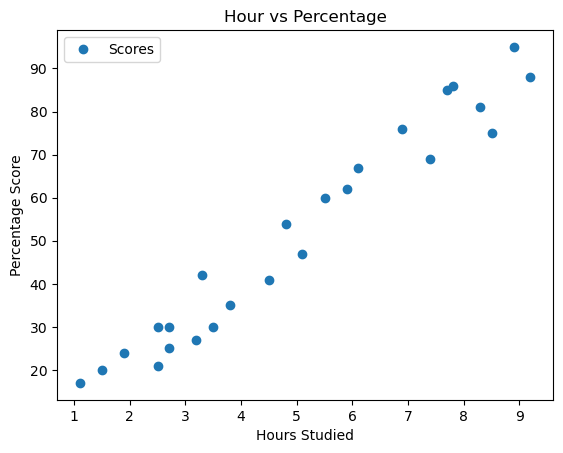

In [3]:
# Plotting 
data.plot(x="Hours",y="Scores",style='o')
plt.title('Hour vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


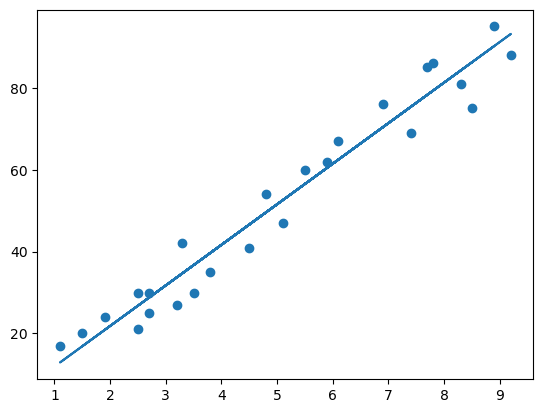

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
# You can also test with your own data
hours = 9.25
# Assuming regressor is your trained regression model
own_pred = regressor.predict([[hours]]) 
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
